In [1]:
!pip install datasets[audio]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

In [4]:
voxpop = load_dataset("facebook/voxpopuli", "en", split="train", streaming=True)
voxpop

In [8]:
datalist = voxpop.take(3)
datalist

In [11]:
data = list(datalist)[2]

In [12]:
data

{'audio_id': '20180314-0900-PLENARY-13-en_20180314-16:03:18_3',
 'language': 0,
 'audio': {'path': 'train_part_0/20180314-0900-PLENARY-13-en_20180314-16:03:18_3.wav',
  'array': array([ 0.00201416, -0.00344849, -0.00460815, ...,  0.00076294,
          0.00198364,  0.0012207 ]),
  'sampling_rate': 16000},
 'raw_text': 'In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,',
 'normalized_text': 'in order to increase the preparedness at national and eu level the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation cooperation between member states economic cross border and cross sector collaboration',
 'gender': 'female',
 'speaker_id': 'None',
 'is_gold_transcript': True,
 'accent': 'None'}

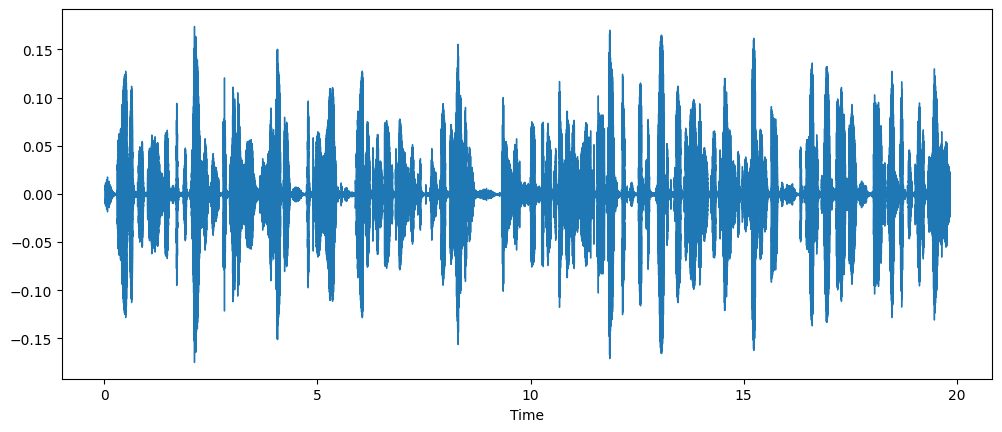

In [13]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = data["audio"]["array"]
sampling_rate = data["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

In [14]:
from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

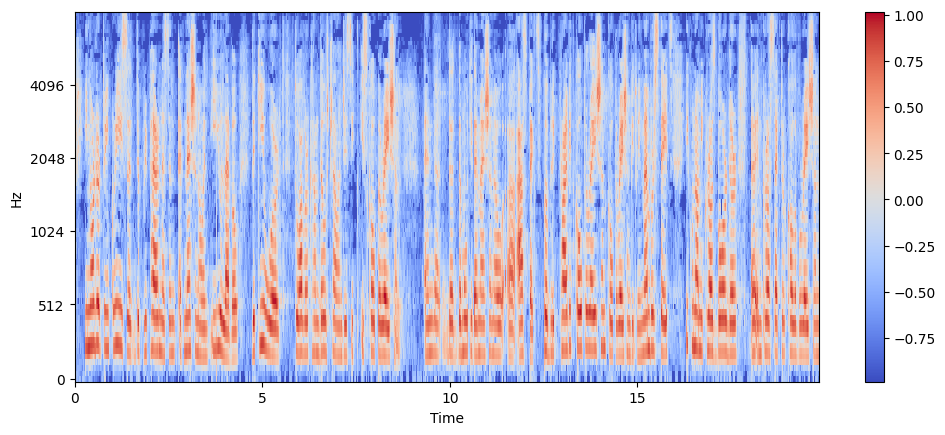

In [21]:
import numpy as np

features = feature_extractor(data["audio"]["array"], sampling_rate = data["audio"]["sampling_rate"], padding = True)["input_features"]

plt.figure().set_figwidth(12)
librosa.display.specshow(
    np.asarray(features[0]),
    x_axis="time",
    y_axis="mel",
    sr = feature_extractor.sampling_rate,
    hop_length = feature_extractor.hop_length
)
plt.colorbar()


In [23]:
from transformers import pipeline
pipe = pipeline("automatic-speech-recognition", model = "facebook/wav2vec2-base-10k-voxpopuli-ft-en", device = 0)

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-10k-voxpopuli-ft-en were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-10k-voxpopuli-ft-en and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You sho

tokenizer_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

In [26]:
pipe(data["audio"]["array"])

{'text': 'in order to increase the prepareness ad at national and eu level the key word to overcome those challenges its cooperation and the multi dimensional aspectsof public private cooperation cooperation between member states economic cross border and cross sector collaboration'}